**To test different singleTb values between ENSO and rainy vs. non-rainy season months, just find and replace to another eg: 225 to 240**

In [93]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [94]:
# Import the libraries
import functions
import dictionaries

In [95]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

**Brightness temp (Tb) comparison**

In [96]:
#read in the Track.h5 files for Jan 1998
mcstracks_240_1998=pd.read_hdf('Save/Jan_1998/Track_240.h5','table')
mcstracks_240_1998=pd.read_hdf('Save/Jan_1998/Track_240.h5','table')
mcstracks_240_1998=pd.read_hdf('Save/Jan_1998/Track_240.h5','table')
mcstracks_240_1998=pd.read_hdf('Save/Jan_1998/Track_240.h5','table')
mcstracks_241_1998=pd.read_hdf('Save/Jan_1998/Track_241.h5','table')
mcstracks_245_1998=pd.read_hdf('Save/Jan_1998/Track_245.h5','table')

#read in the Track.h5 files for Jul 1998
mcstracks_240_jul=pd.read_hdf('Save/Jul_1998/singleTb/Track_240.h5','table')
mcstracks_240_jul=pd.read_hdf('Save/Jul_1998/singleTb/Track_240.h5','table')
mcstracks_240_jul=pd.read_hdf('Save/Jul_1998/singleTb/Track_240.h5','table')
mcstracks_240_jul=pd.read_hdf('Save/Jul_1998/singleTb/Track_240.h5','table')
mcstracks_241_jul=pd.read_hdf('Save/Jul_1998/singleTb/Track_241.h5','table')
mcstracks_245_jul=pd.read_hdf('Save/Jul_1998/singleTb/Track_245.h5','table')

#read in the Track.h5 files for Jan 2000
mcstracks_240_2000=pd.read_hdf('Save/Jan_2000/singleTb/Track_240.h5','table')
mcstracks_240_2000=pd.read_hdf('Save/Jan_2000/singleTb/Track_240.h5','table')
mcstracks_240_2000=pd.read_hdf('Save/Jan_2000/singleTb/Track_240.h5','table')
mcstracks_240_2000=pd.read_hdf('Save/Jan_2000/singleTb/Track_240.h5','table')
mcstracks_241_2000=pd.read_hdf('Save/Jan_2000/singleTb/Track_241.h5','table')
mcstracks_245_2000=pd.read_hdf('Save/Jan_2000/singleTb/Track_245.h5','table')

#read in the Track.h5 files for Jan 2005
mcstracks_240_2005=pd.read_hdf('Save/Jan_2005/singleTb/Track_240.h5','table')
mcstracks_240_2005=pd.read_hdf('Save/Jan_2005/singleTb/Track_240.h5','table')
mcstracks_240_2005=pd.read_hdf('Save/Jan_2005/singleTb/Track_240.h5','table')
mcstracks_240_2005=pd.read_hdf('Save/Jan_2005/singleTb/Track_240.h5','table')
mcstracks_241_2005=pd.read_hdf('Save/Jan_2005/singleTb/Track_241.h5','table')
mcstracks_245_2005=pd.read_hdf('Save/Jan_2005/singleTb/Track_245.h5','table')

In [97]:
dataframes = [mcstracks_240_1998, mcstracks_240_1998, mcstracks_240_1998, mcstracks_240_1998, mcstracks_241_1998, mcstracks_245_1998,mcstracks_240_jul, mcstracks_240_jul, mcstracks_240_jul,mcstracks_240_jul, mcstracks_241_jul, mcstracks_245_jul, mcstracks_240_2000, mcstracks_240_2000, mcstracks_240_2000, mcstracks_240_2000, mcstracks_241_2000, mcstracks_245_2000, mcstracks_240_2005, mcstracks_240_2005, mcstracks_240_2005, mcstracks_240_2005, mcstracks_241_2005, mcstracks_245_2005]

In [98]:
for df in dataframes:
    df.timestr = df.timestr.astype(str)
    df['datetime'] = pd.to_datetime(df.timestr.str.split(',\s*').str[0])
    set(df['datetime'])


In [99]:
#jan 1998 (240K)
init_hours_240_1998 = functions.get_mcs_init(mcstracks_240_1998)
init_hours_240_1998 = np.array(init_hours_240_1998)
init_hours_240_1998, bins = np.histogram(init_hours_240_1998, bins = np.arange(0,25))

diss_hours_240_1998 = functions.get_mcs_diss(mcstracks_240_1998)
diss_hours_240_1998 = np.array(diss_hours_240_1998)
diss_hours_240_1998, bins = np.histogram(diss_hours_240_1998, bins = np.arange(0,25))

init_240_1998 = init_hours_240_1998/np.nansum(init_hours_240_1998) * 100
diss_240_1998 = diss_hours_240_1998/np.nansum(diss_hours_240_1998) * 100


#jul 1998 (240K)
init_hours_240_jul = functions.get_mcs_init(mcstracks_240_jul)
init_hours_240_jul = np.array(init_hours_240_jul)
init_hours_240_jul, bins = np.histogram(init_hours_240_jul, bins = np.arange(0,25))

diss_hours_240_jul = functions.get_mcs_diss(mcstracks_240_jul)
diss_hours_240_jul = np.array(diss_hours_240_jul)
diss_hours_240_jul, bins = np.histogram(diss_hours_240_jul, bins = np.arange(0,25))

init_240_jul = init_hours_240_jul/np.nansum(init_hours_240_jul) * 100
diss_240_jul = diss_hours_240_jul/np.nansum(diss_hours_240_jul) * 100


#jan 2000 (240K)
init_hours_240_2000 = functions.get_mcs_init(mcstracks_240_2000)
init_hours_240_2000 = np.array(init_hours_240_2000)
init_hours_240_2000, bins = np.histogram(init_hours_240_2000, bins = np.arange(0,25))

diss_hours_240_2000 = functions.get_mcs_diss(mcstracks_240_2000)
diss_hours_240_2000 = np.array(diss_hours_240_2000)
diss_hours_240_2000, bins = np.histogram(diss_hours_240_2000, bins = np.arange(0,25))

init_240_2000 = init_hours_240_2000/np.nansum(init_hours_240_2000) * 100
diss_240_2000 = diss_hours_240_2000/np.nansum(diss_hours_240_2000) * 100


#jan 2005 (240K)
init_hours_240_2005 = functions.get_mcs_init(mcstracks_240_2005)
init_hours_240_2005 = np.array(init_hours_240_2005)
init_hours_240_2005, bins = np.histogram(init_hours_240_2005, bins = np.arange(0,25))

diss_hours_240_2005 = functions.get_mcs_diss(mcstracks_240_2005)
diss_hours_240_2005 = np.array(diss_hours_240_2005)
diss_hours_240_2005, bins = np.histogram(diss_hours_240_2005, bins = np.arange(0,25))

init_240_2005 = init_hours_240_2005/np.nansum(init_hours_240_2005) * 100
diss_240_2005 = diss_hours_240_2005/np.nansum(diss_hours_240_2005) * 100



Text(0, 0.5, 'Frequency [%]')

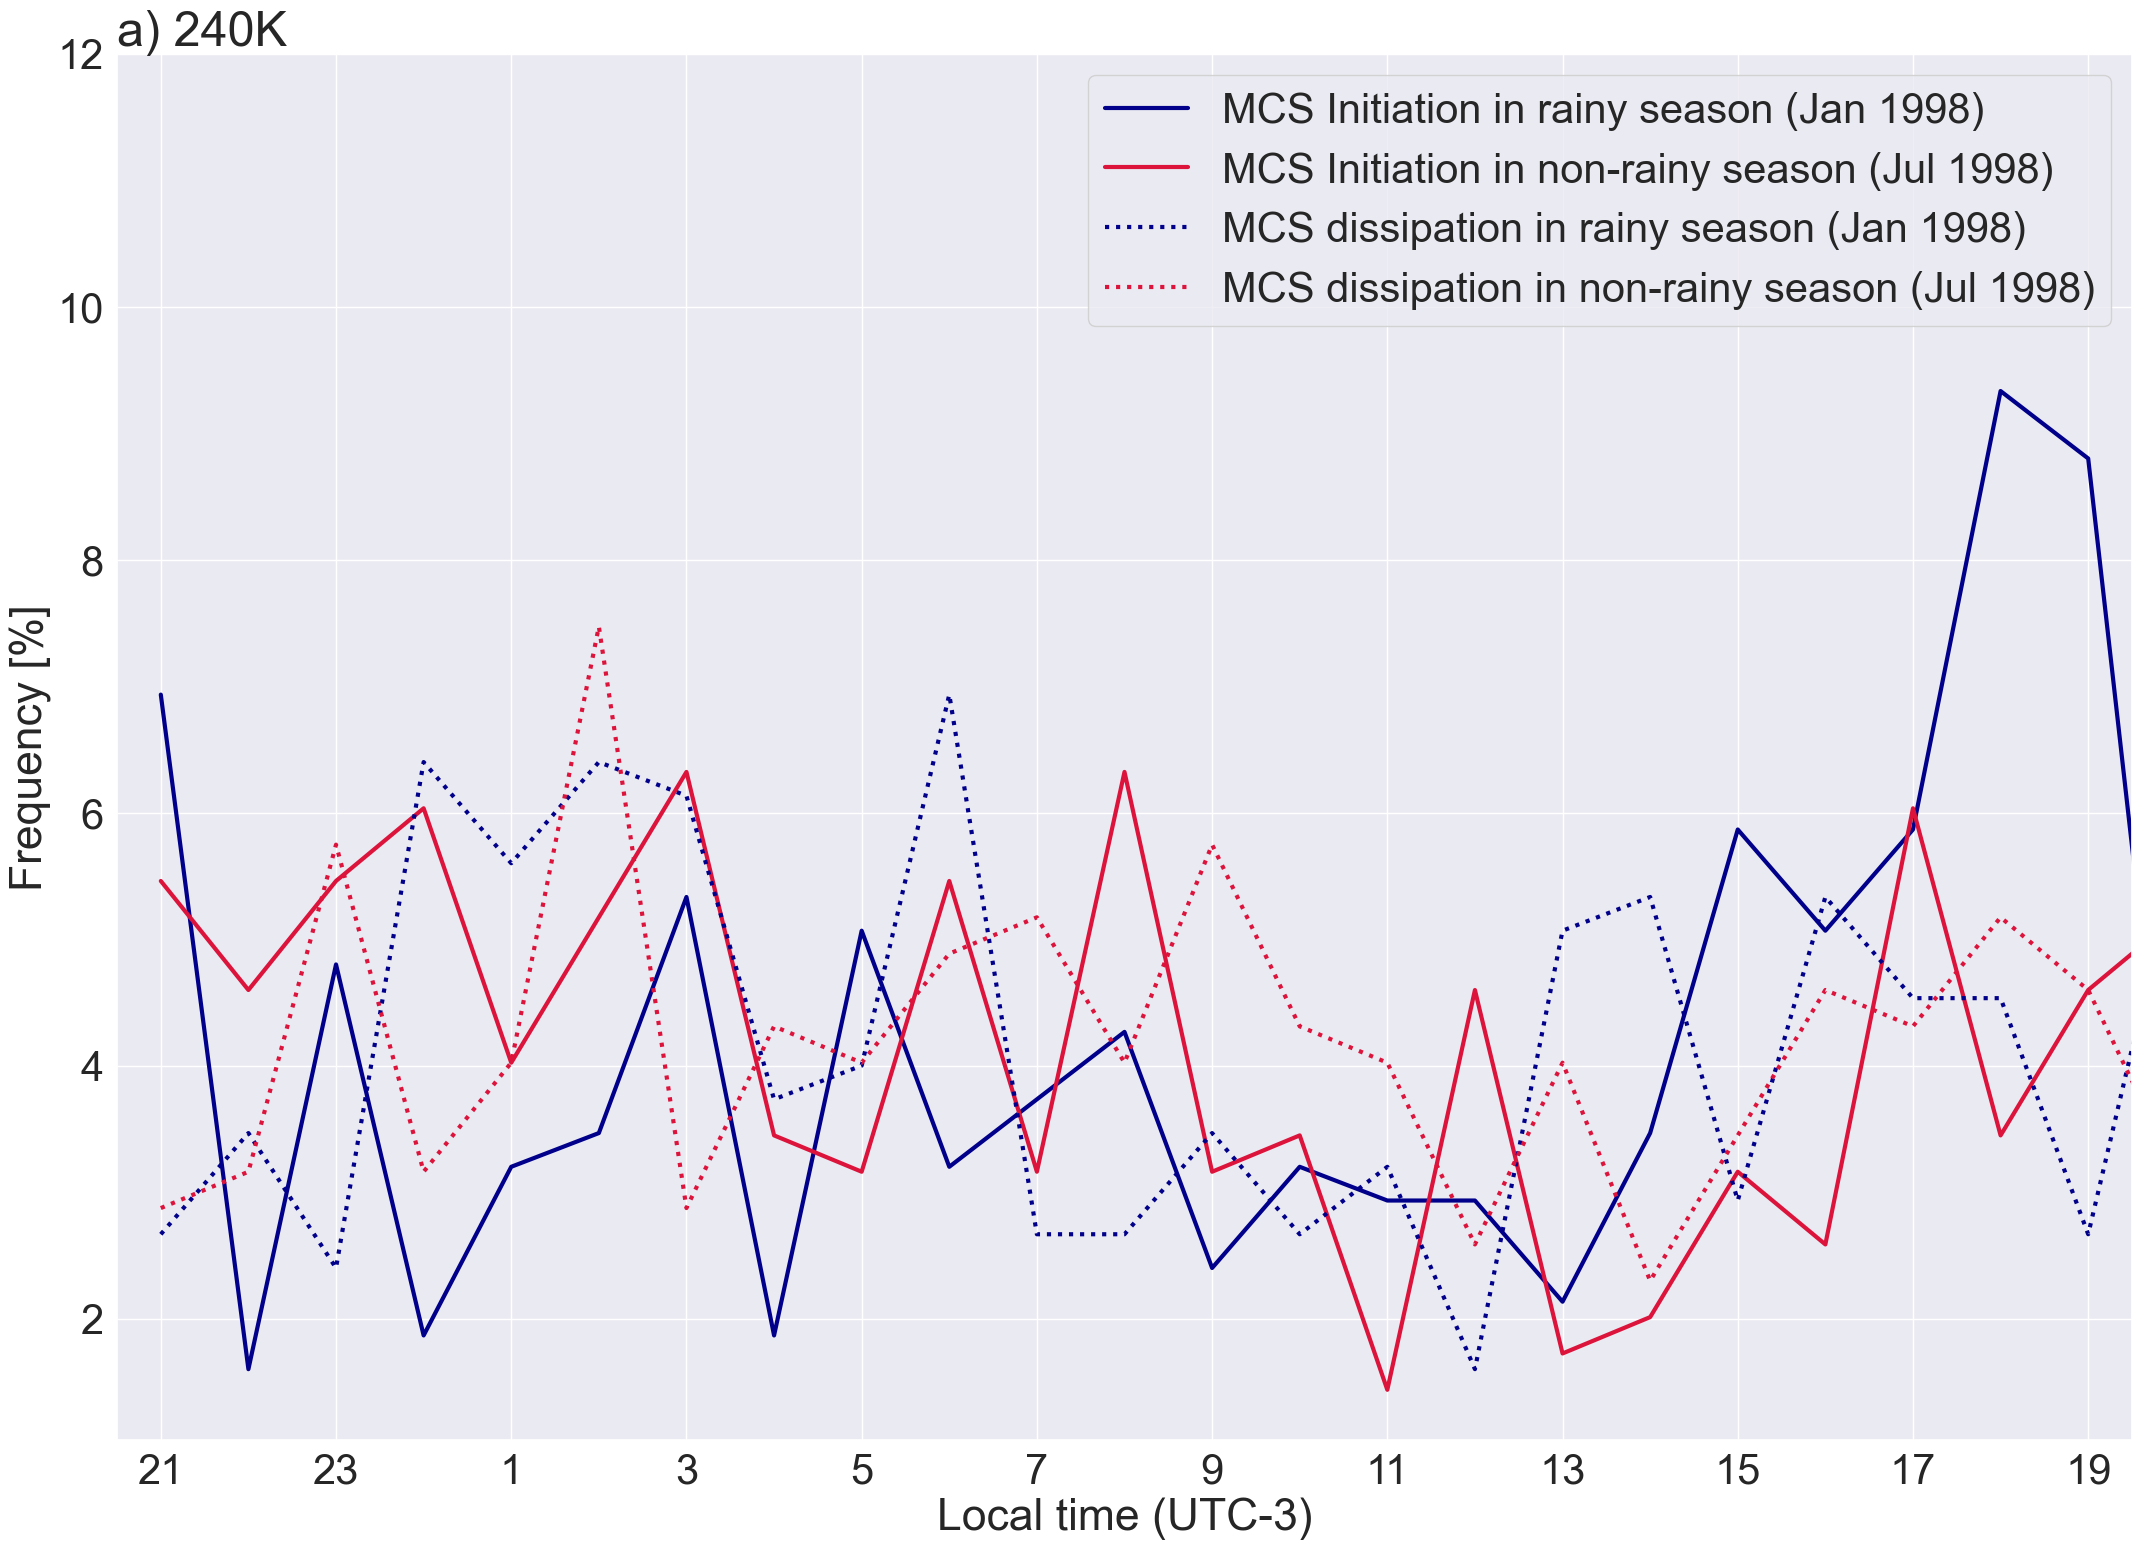

In [100]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,18))
f= 30
lf= 30
l=32

plt.title('a) 240K ', loc='left', fontsize= 35 )
plt.plot(np.arange(0,24), init_240_1998, label = 'MCS Initiation in rainy season (Jan 1998)', color= 'darkblue', linewidth = 3)
plt.plot(np.arange(0,24), init_240_jul, label = 'MCS Initiation in non-rainy season (Jul 1998)', color= 'crimson', linewidth = 3)
plt.plot(np.arange(0,24), diss_240_1998, label = 'MCS dissipation in rainy season (Jan 1998)', color= 'darkblue', linewidth = 3, linestyle = 'dotted')
plt.plot(np.arange(0,24), diss_240_jul, label = 'MCS dissipation in non-rainy season (Jul 1998)', color= 'crimson', linewidth = 3, linestyle = 'dotted')

#plt.plot(np.arange(0,24), init_240_2000, label = 'initiation ', color= 'teal', linewidth = 3)
#plt.plot(np.arange(0,24), init_240_2005, label = 'initiation ', color= 'purple', linewidth = 3)
plt.legend(fontsize=lf)

a= np.arange(21,24,2)
b= np.arange(1,20,2)
localtime= np.append(a, b)

labels=localtime.astype(str)
plt.yticks(np.arange(2,14,2),fontsize=f)
plt.xticks(np.arange(0,23)[::2],labels=labels, fontsize= f)
#plt.yticklabels(plt.get_yticks(),fontsize=f)
#plt.xticklabels(labels,fontsize= f)
plt.xlim(-0.5,22.5)
plt.xlabel('Local time (UTC-3)', fontsize= l)
plt.ylabel('Frequency [%]', fontsize= l)

Text(0, 0.5, 'Frequency [%]')

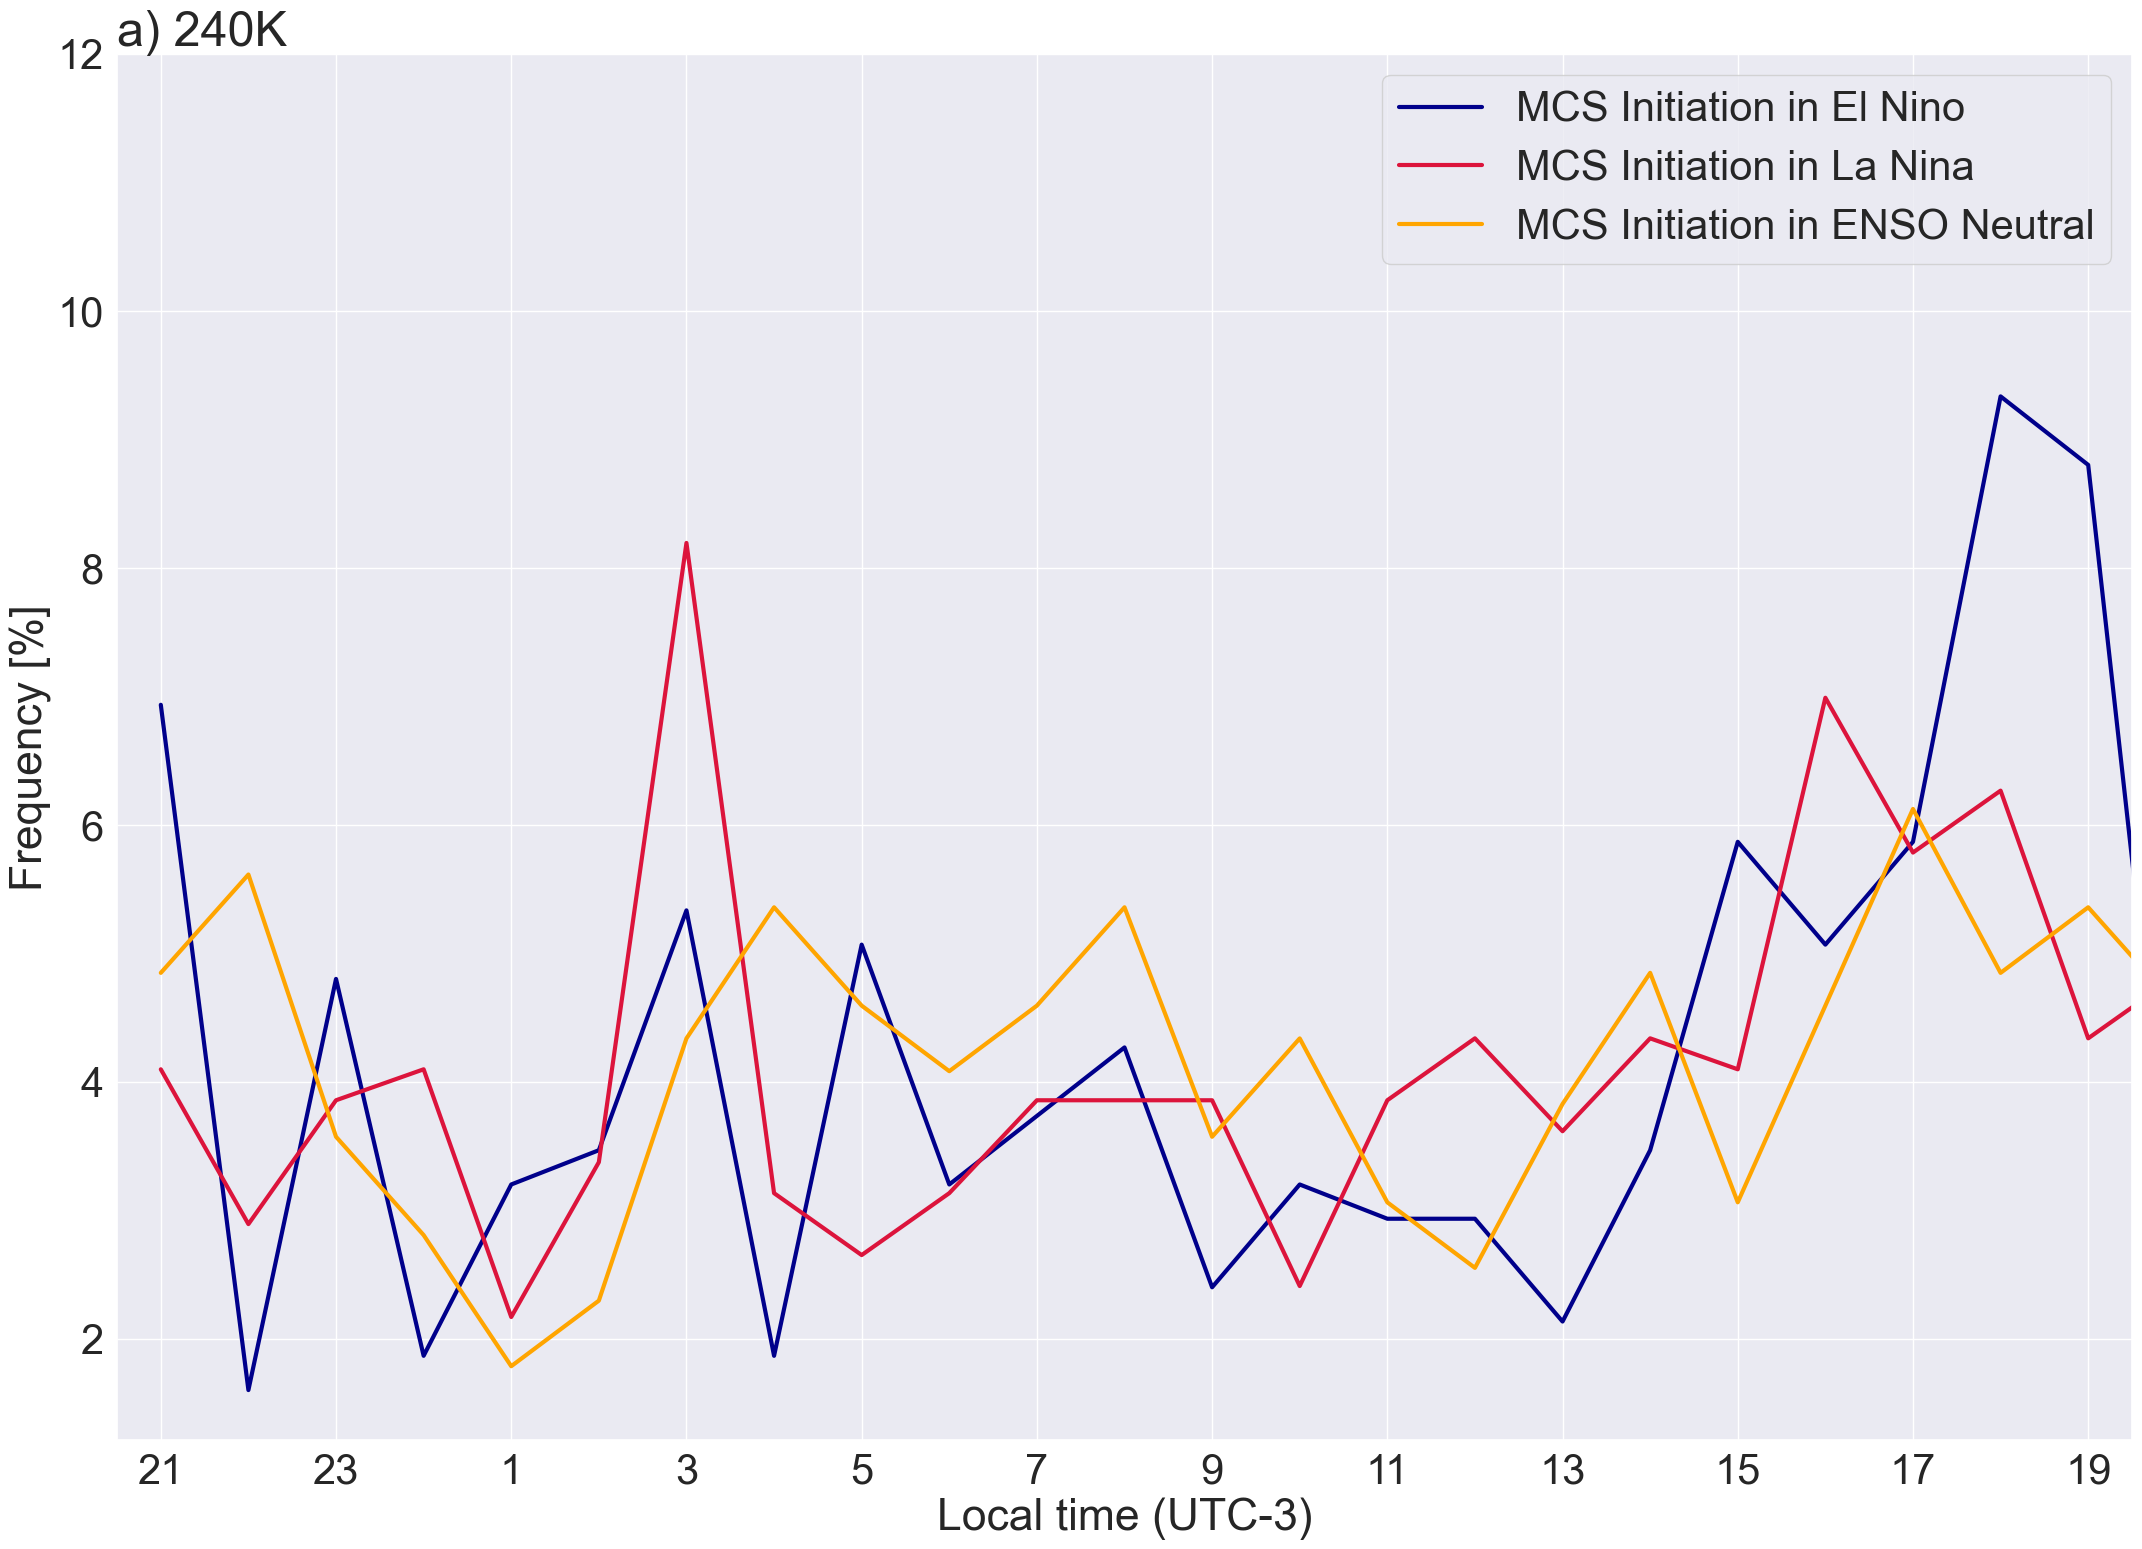

In [101]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,18))
f= 30
lf= 30
l=32

plt.title('a) 240K ', loc='left', fontsize= 35 )
plt.plot(np.arange(0,24), init_240_1998, label = 'MCS Initiation in El Nino', color= 'darkblue', linewidth = 3)
plt.plot(np.arange(0,24), init_240_2000, label = 'MCS Initiation in La Nina', color= 'crimson', linewidth = 3)
plt.plot(np.arange(0,24), init_240_2005, label = 'MCS Initiation in ENSO Neutral', color= 'orange', linewidth = 3)


#plt.plot(np.arange(0,24), init_240_2000, label = 'initiation ', color= 'teal', linewidth = 3)
#plt.plot(np.arange(0,24), init_240_2005, label = 'initiation ', color= 'purple', linewidth = 3)
plt.legend(fontsize=lf)

a= np.arange(21,24,2)
b= np.arange(1,20,2)
localtime= np.append(a, b)

labels=localtime.astype(str)
plt.yticks(np.arange(2,14,2),fontsize=f)
plt.xticks(np.arange(0,23)[::2],labels=labels, fontsize= f)
#plt.yticklabels(plt.get_yticks(),fontsize=f)
#plt.xticklabels(labels,fontsize= f)
plt.xlim(-0.5,22.5)
plt.xlabel('Local time (UTC-3)', fontsize= l)
plt.ylabel('Frequency [%]', fontsize= l)

Text(0, 0.5, 'Frequency [%]')

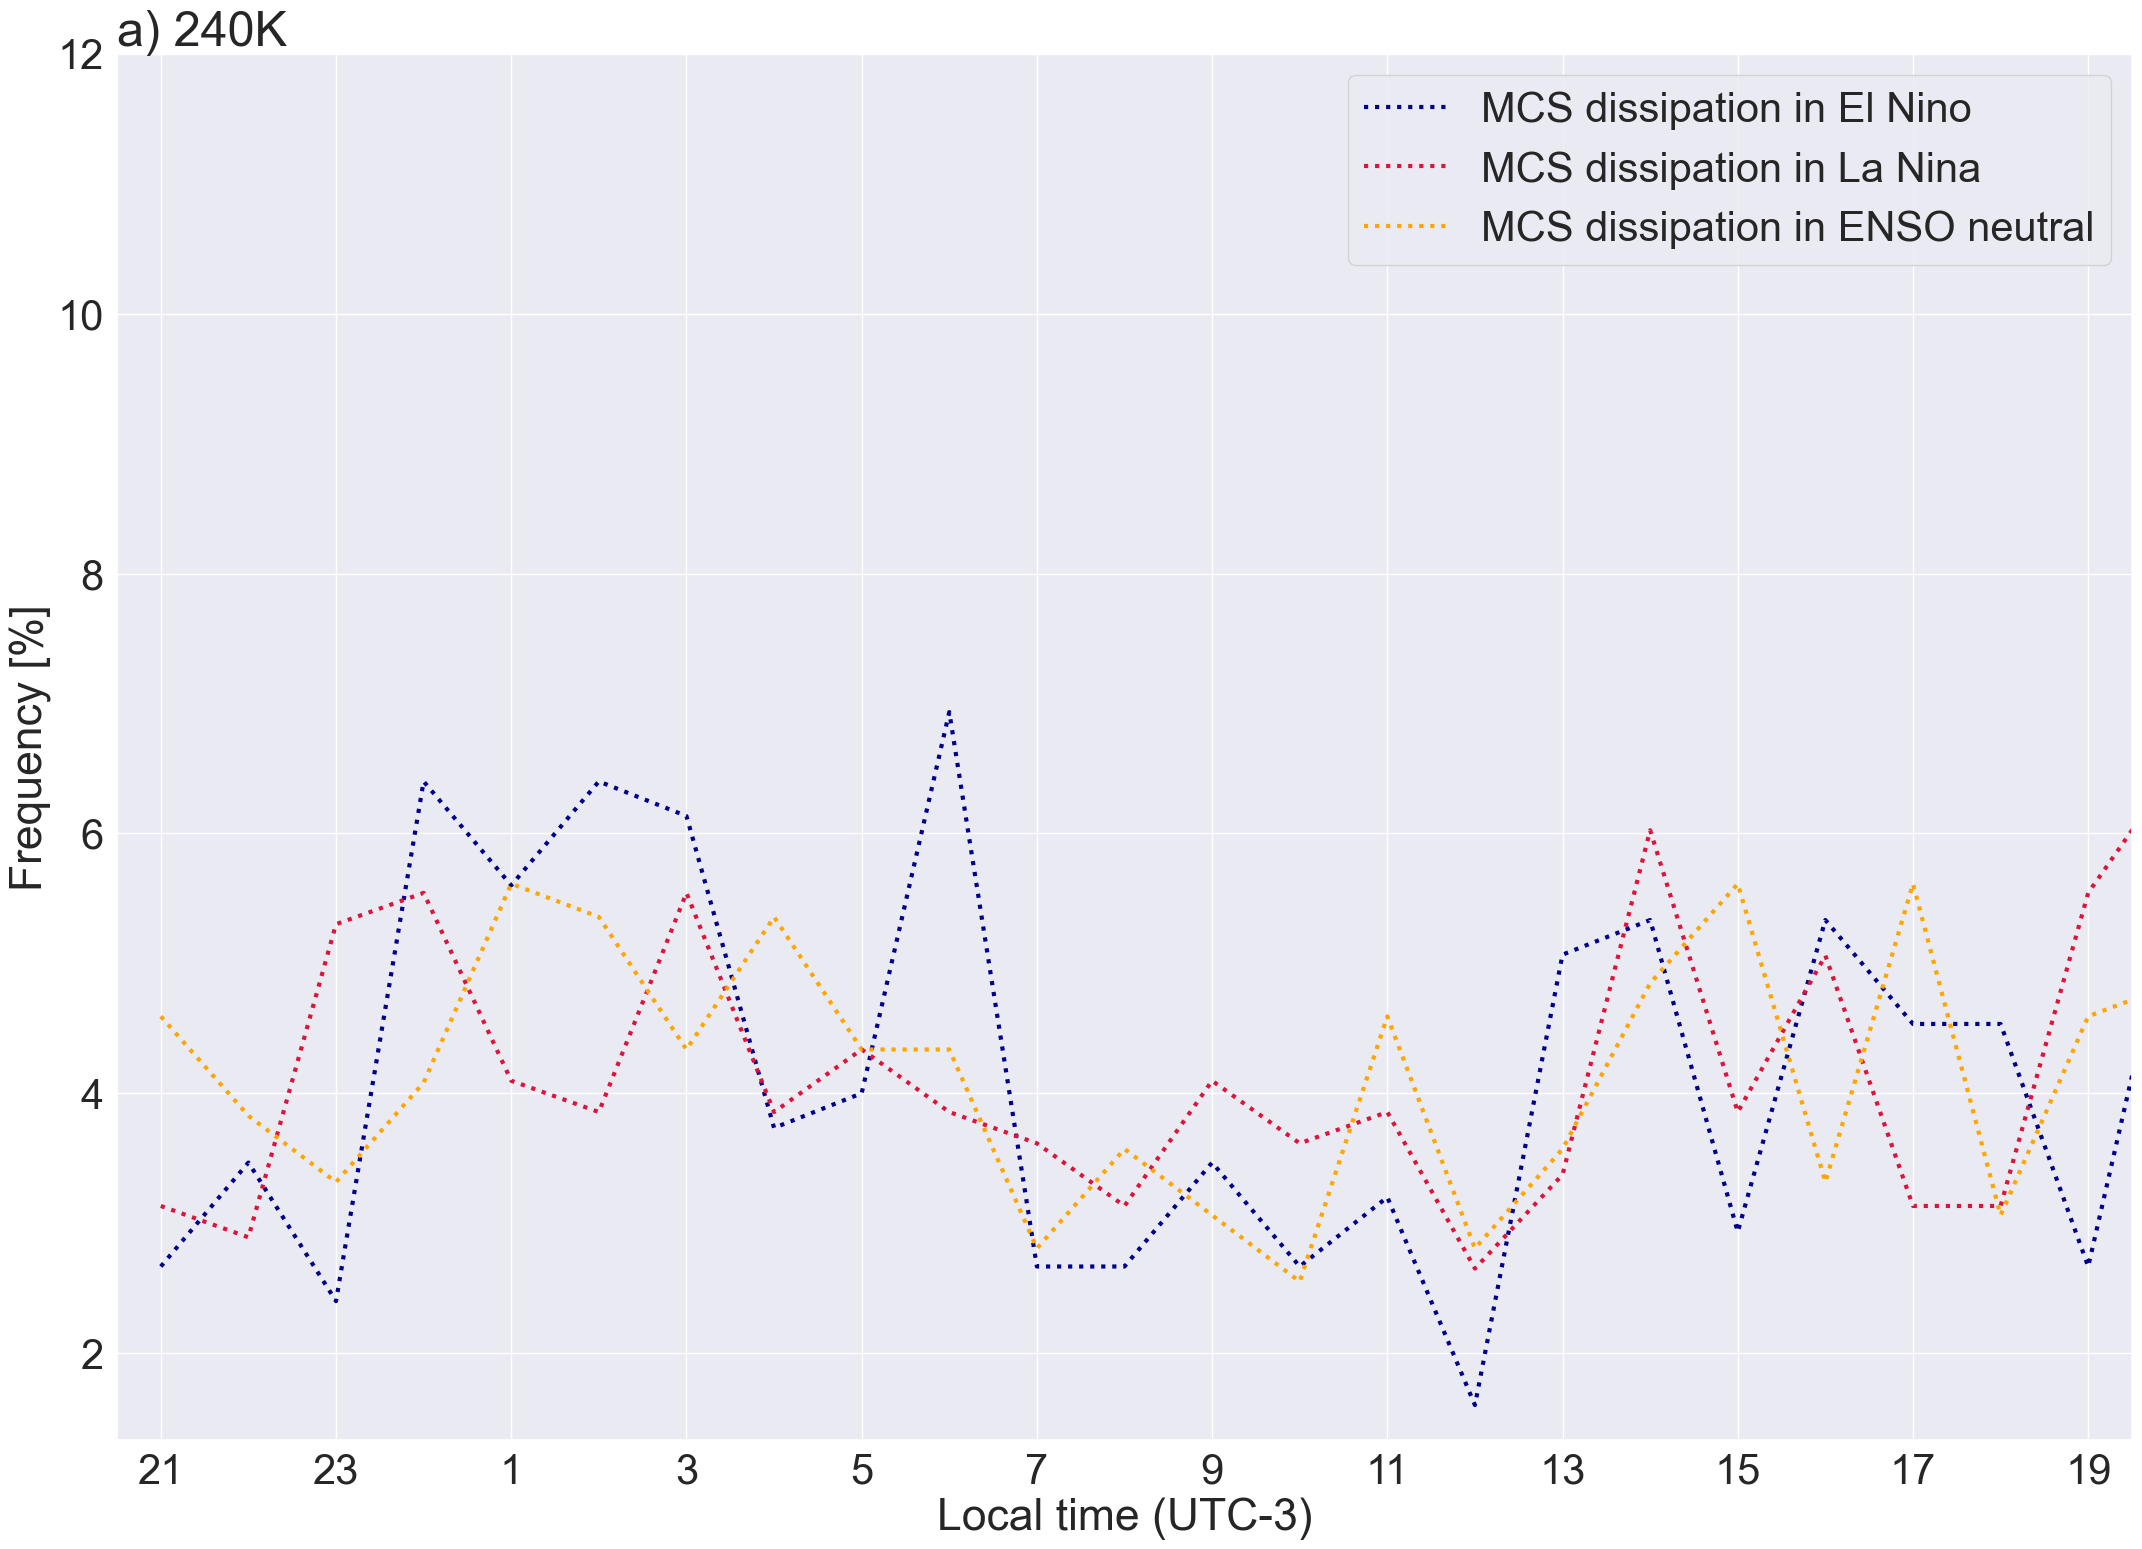

In [102]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,18))
f= 30
lf= 30
l=32

plt.title('a) 240K ', loc='left', fontsize= 35 )
plt.plot(np.arange(0,24), diss_240_1998, label = 'MCS dissipation in El Nino', color= 'darkblue', linewidth = 3, linestyle = 'dotted')
plt.plot(np.arange(0,24), diss_240_2000, label = 'MCS dissipation in La Nina', color= 'crimson', linewidth = 3, linestyle = 'dotted')
plt.plot(np.arange(0,24), diss_240_2005, label = 'MCS dissipation in ENSO neutral', color= 'orange', linewidth = 3, linestyle = 'dotted')
plt.legend(fontsize=lf)

a= np.arange(21,24,2)
b= np.arange(1,20,2)
localtime= np.append(a, b)

labels=localtime.astype(str)
plt.yticks(np.arange(2,14,2),fontsize=f)
plt.xticks(np.arange(0,23)[::2],labels=labels, fontsize= f)
plt.xlim(-0.5,22.5)
plt.xlabel('Local time (UTC-3)', fontsize= l)
plt.ylabel('Frequency [%]', fontsize= l)

In [103]:
init_lats_240_1998, init_lons_240_1998, diss_lats_240_1998, diss_lons_240_1998 = functions.get_init(mcstracks_240_1998)
init_lats_240_jul, init_lons_240_jul, diss_lats_240_jul, diss_lons_240_jul = functions.get_init(mcstracks_240_jul)
init_lats_240_2000, init_lons_240_2000, diss_lats_240_2000, diss_lons_240_2000 = functions.get_init(mcstracks_240_2000)
init_lats_240_2005, init_lons_240_2005, diss_lats_240_2005, diss_lons_240_2005 = functions.get_init(mcstracks_240_2005)





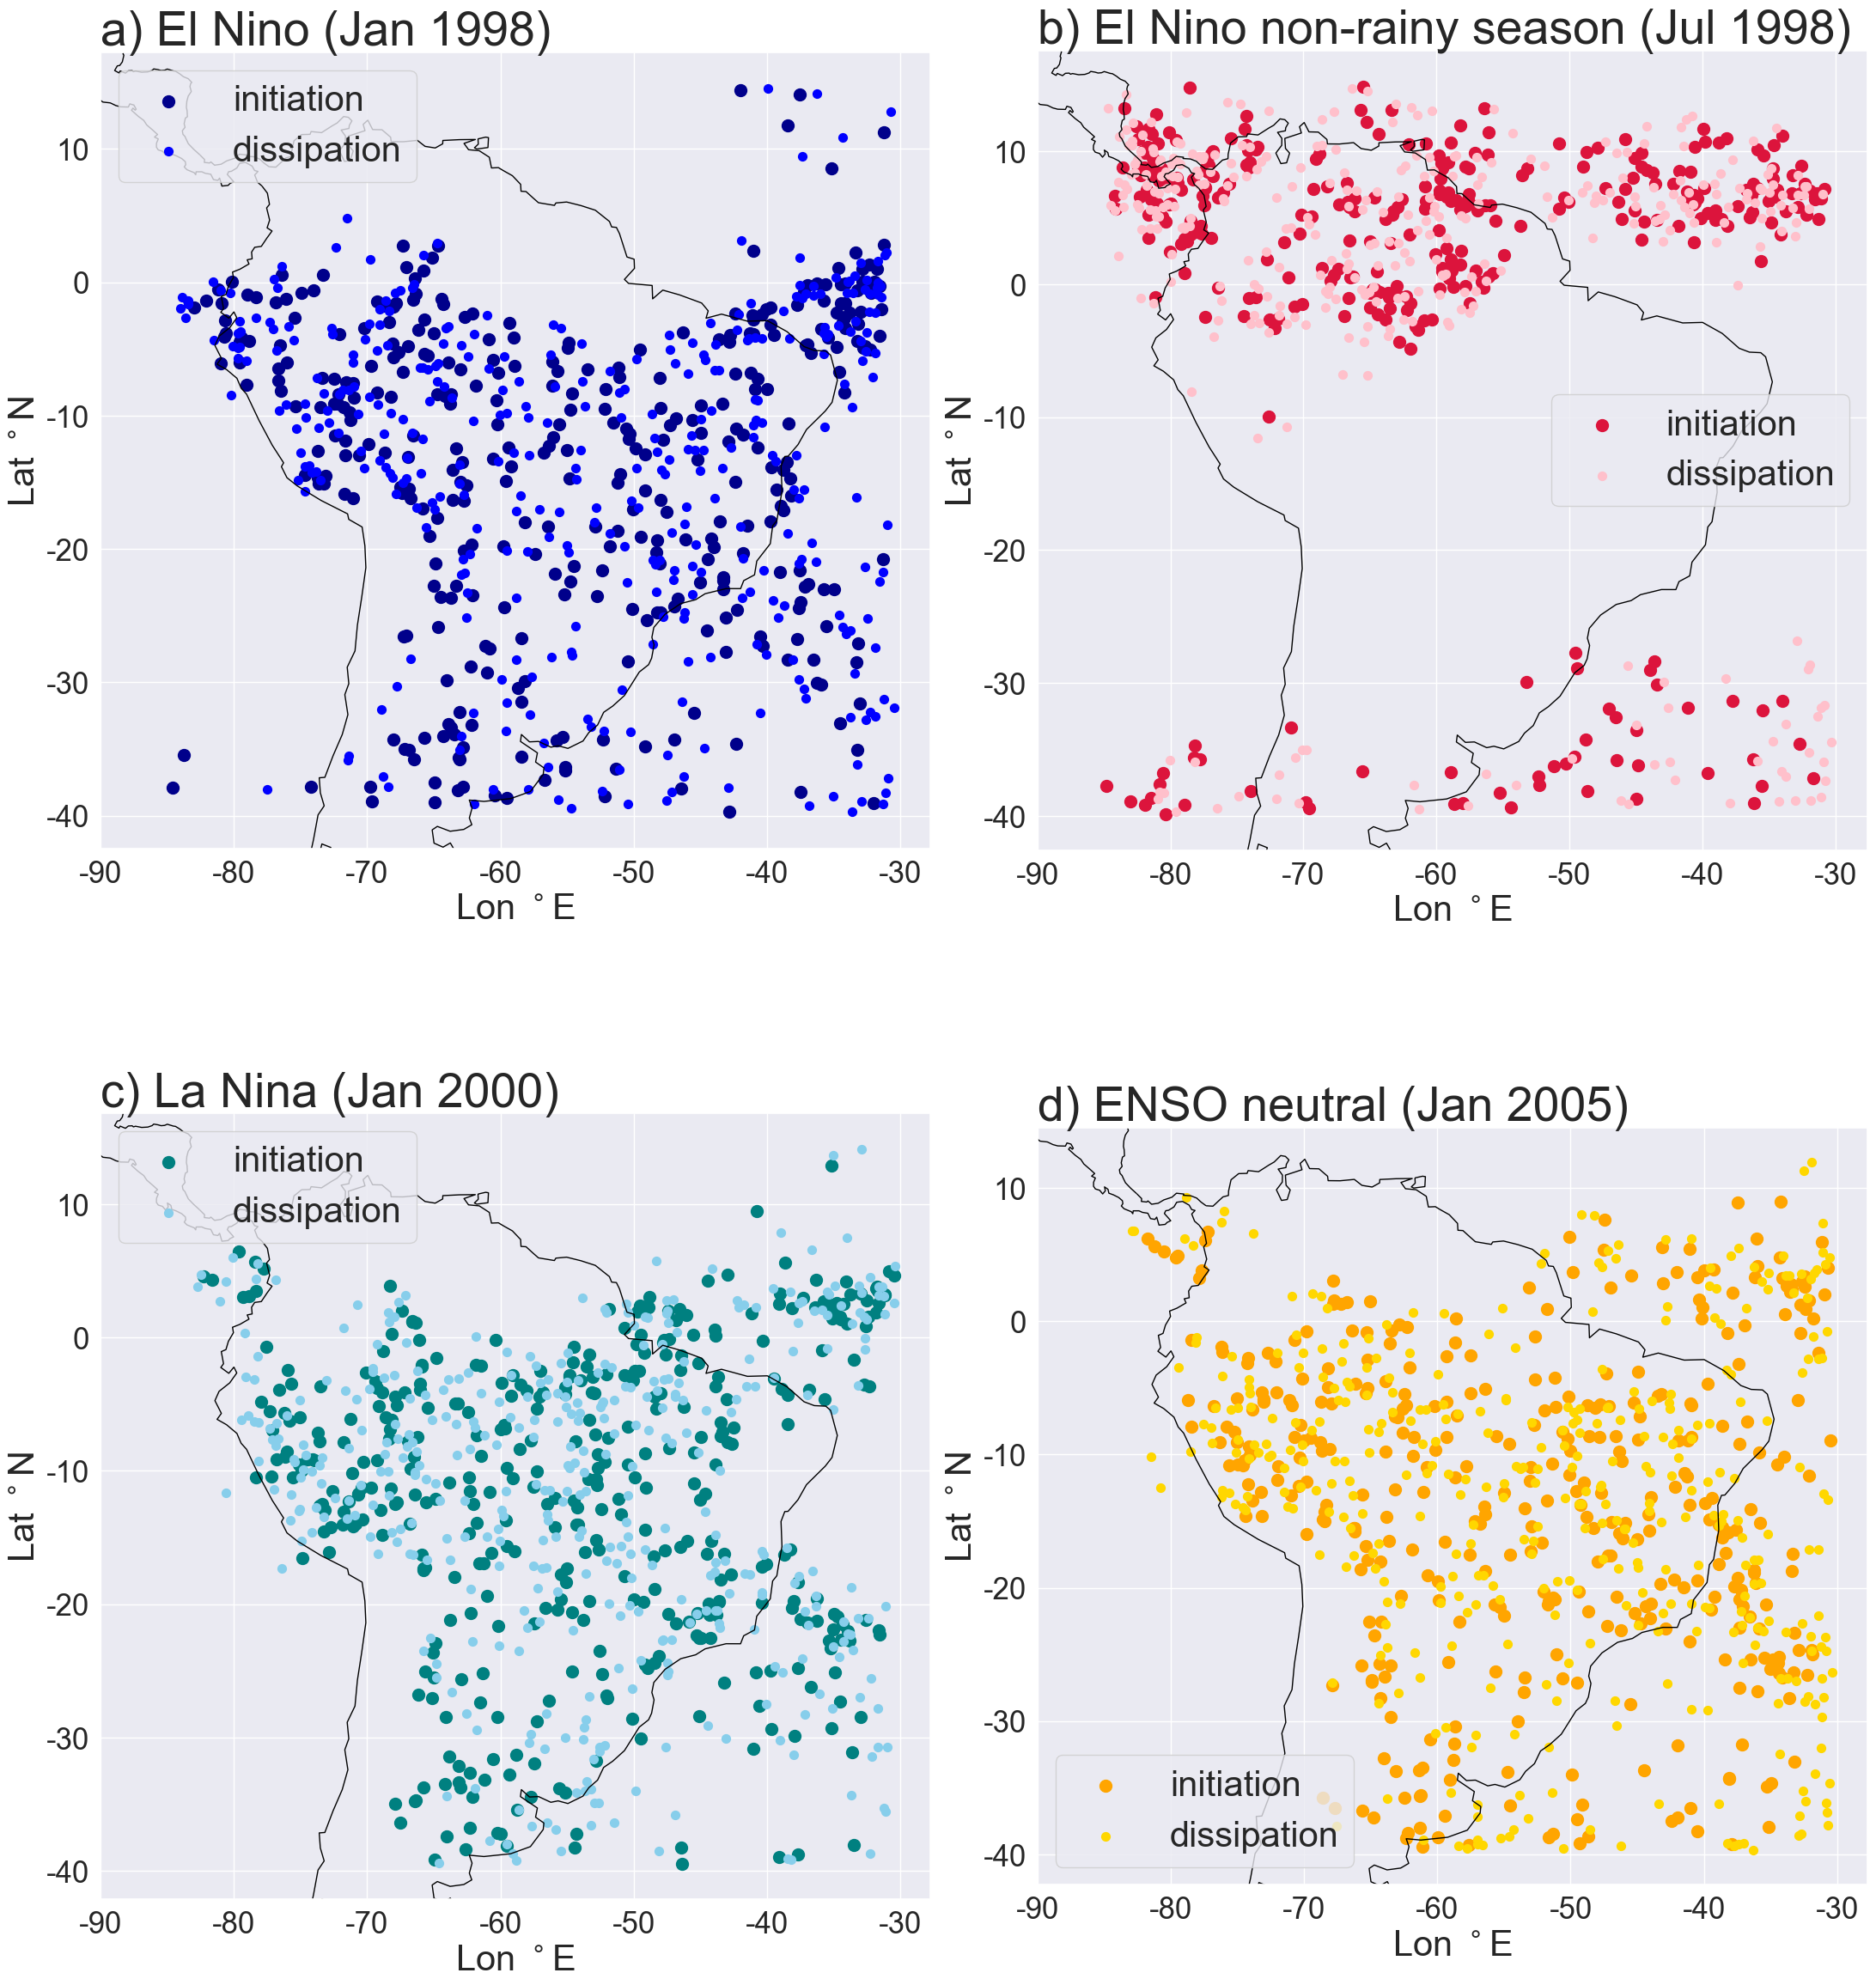

In [104]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(22,25))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100
#fontsize
f=40

plt.subplots_adjust(wspace=0,hspace=0)
# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.set_title('a) El Nino (Jan 1998) ', loc='left', fontsize= f )
ax1.scatter(init_lons_240_1998, init_lats_240_1998,  color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_240_1998, diss_lats_240_1998,  color='blue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines()
ax1.legend(fontsize= 30)
ax1.set_xticks(xlabels, xlabels)
ax1.set_yticks(ylabels,ylabels)
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.set_title('b) El Nino non-rainy season (Jul 1998) ', loc='left', fontsize= f )
ax2.scatter(init_lons_240_jul, init_lats_240_jul,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_240_jul, diss_lats_240_jul,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax2.coastlines()
ax2.legend(fontsize= 30)
ax2.set_xticks(xlabels, xlabels)
ax2.set_yticks(ylabels,ylabels)
ax2.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.set_title('c) La Nina (Jan 2000) ', loc='left', fontsize= f )
ax3.scatter(init_lons_240_2000, init_lats_240_2000,  color='teal',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax3.scatter(diss_lons_240_2000, diss_lats_240_2000,  color='skyblue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax3.coastlines()
ax3.legend(fontsize= 30)
ax3.set_xticks(xlabels, xlabels)
ax3.set_yticks(ylabels,ylabels)
ax3.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.set_title('d) ENSO neutral (Jan 2005) ', loc='left', fontsize= f )
ax4.scatter(init_lons_240_2005, init_lats_240_2005,  color='orange',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax4.scatter(diss_lons_240_2005, diss_lats_240_2005,  color='gold',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax4.coastlines()
ax4.legend(fontsize= 30)
ax4.set_xticks(xlabels, xlabels)
ax4.set_yticks(ylabels,ylabels)
ax4.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=30)

fig.tight_layout()


In [105]:
area_240_1998=functions.get_area(mcstracks_240_1998)
area_240_jul=functions.get_area(mcstracks_240_jul)
area_240_2000=functions.get_area(mcstracks_240_2000)
area_240_2005=functions.get_area(mcstracks_240_2005)




array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.
array of MCS areas generated.


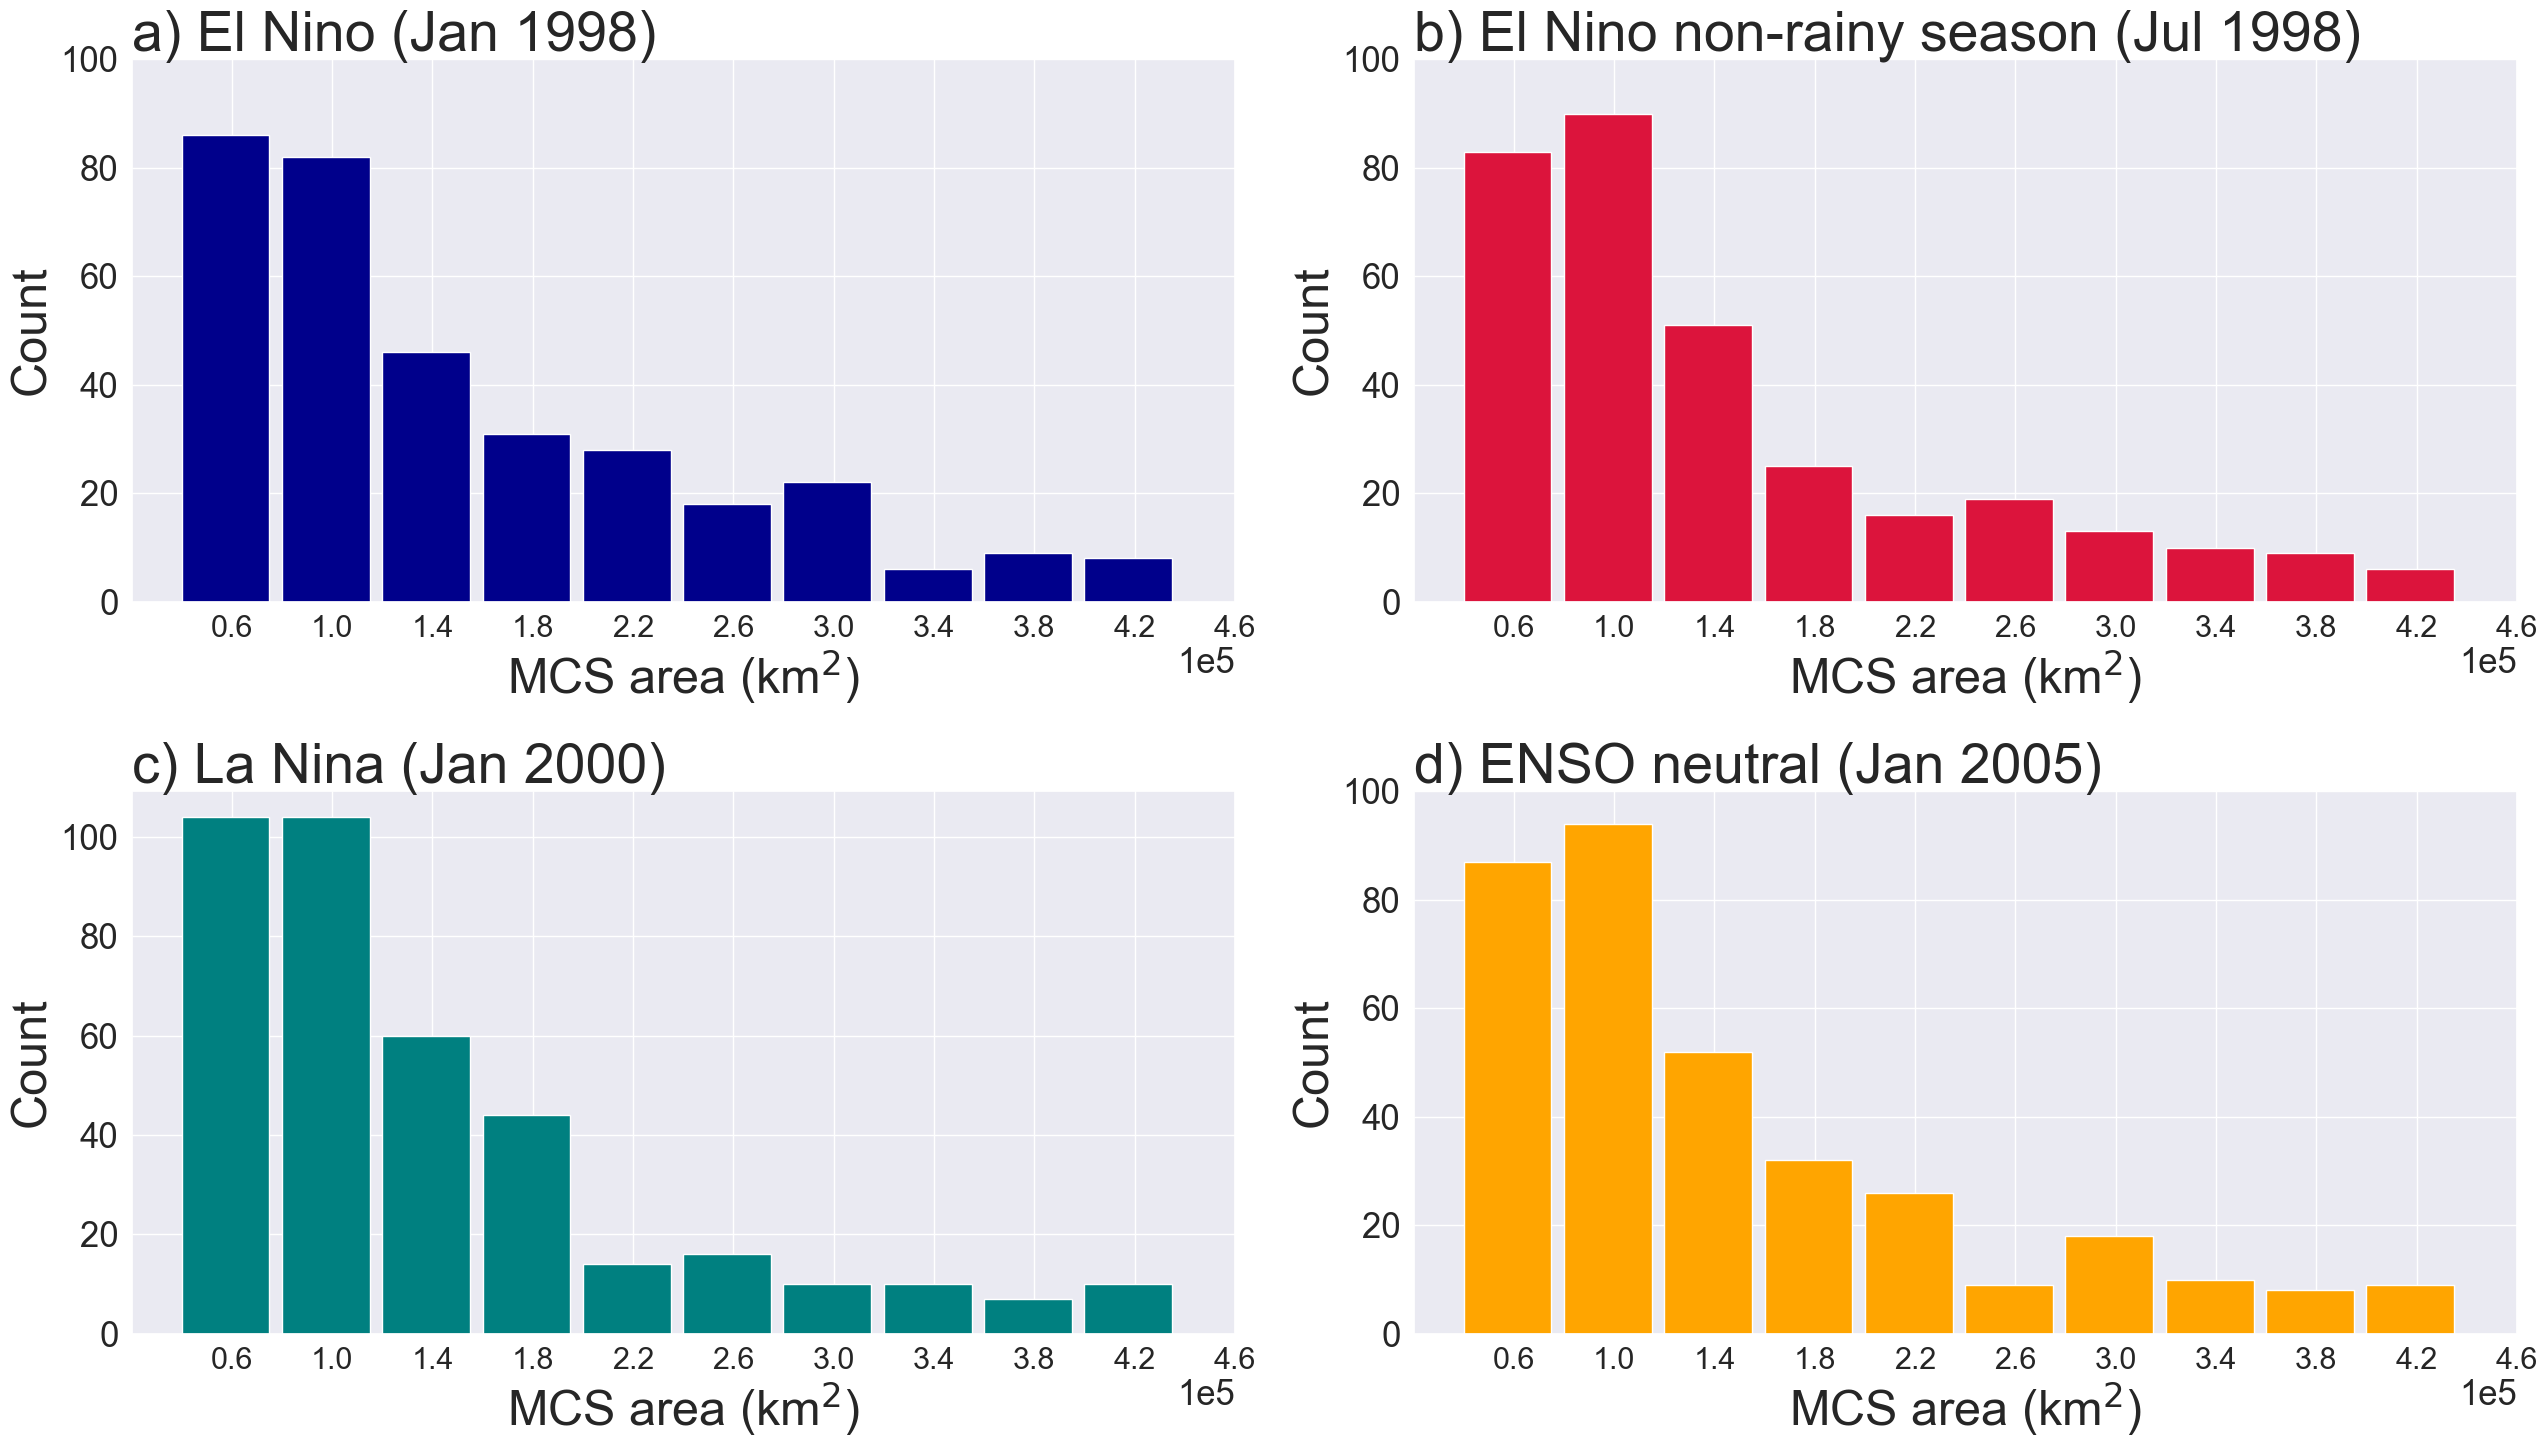

In [106]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=2)

fig = plt.figure(figsize=(26,15))
t = 40
f= 35
n = 25
lf= 15


ax1=plt.subplot(2,2,1)
ax1.set_title('a) El Nino (Jan 1998) ', loc='left', fontsize= t )
ax1.hist(area_240_1998,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'darkblue',align='mid')
ax1.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax1.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax1.set_yticks([0,20,40,60,80,100])
ax1.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.xaxis.get_offset_text().set_fontsize(25)
ax1.set_ylabel('Count',fontsize=f)

ax2=plt.subplot(2,2,2)
ax2.set_title('b) El Nino non-rainy season (Jul 1998) ', loc='left', fontsize= t )
ax2.hist(area_240_jul,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'crimson',align='mid')
ax2.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax2.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax2.set_yticks([0,20,40,60,80,100])
ax2.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.xaxis.get_offset_text().set_fontsize(25)
ax2.set_ylabel('Count',fontsize=f)

ax3=plt.subplot(2,2,3)
ax3.set_title('c) La Nina (Jan 2000) ', loc='left', fontsize= t)
ax3.hist(area_240_2000,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'teal',align='mid')
ax3.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax3.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax3.set_yticks([0,20,40,60,80,100])
ax3.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.xaxis.get_offset_text().set_fontsize(25)
ax3.set_ylabel('Count',fontsize=f)

ax4=plt.subplot(2,2,4)
ax4.set_title('d) ENSO neutral (Jan 2005) ', loc='left', fontsize= t )
ax4.hist(area_240_2005,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'orange',align='mid')
ax4.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax4.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax4.set_yticks([0,20,40,60,80,100])
ax4.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.xaxis.get_offset_text().set_fontsize(25)
ax4.set_ylabel('Count',fontsize=f)

fig.tight_layout()


In [107]:
vel_240_1998= tobac.calculate_velocity(mcstracks_240_1998, method_distance=None)
vel_240_jul= tobac.calculate_velocity(mcstracks_240_jul, method_distance=None)
vel_240_2000= tobac.calculate_velocity(mcstracks_240_2000, method_distance=None)
vel_240_2005= tobac.calculate_velocity(mcstracks_240_2005, method_distance=None)


In [108]:
velocity_240_1998=functions.get_v(vel_240_1998)
velocity_240_jul=functions.get_v(vel_240_jul)
velocity_240_2000=functions.get_v(vel_240_2000)
velocity_240_2005=functions.get_v(vel_240_2005)



propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.
propagation speed histo calculated.


In [109]:
import numpy as np

def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins))
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
    return bins

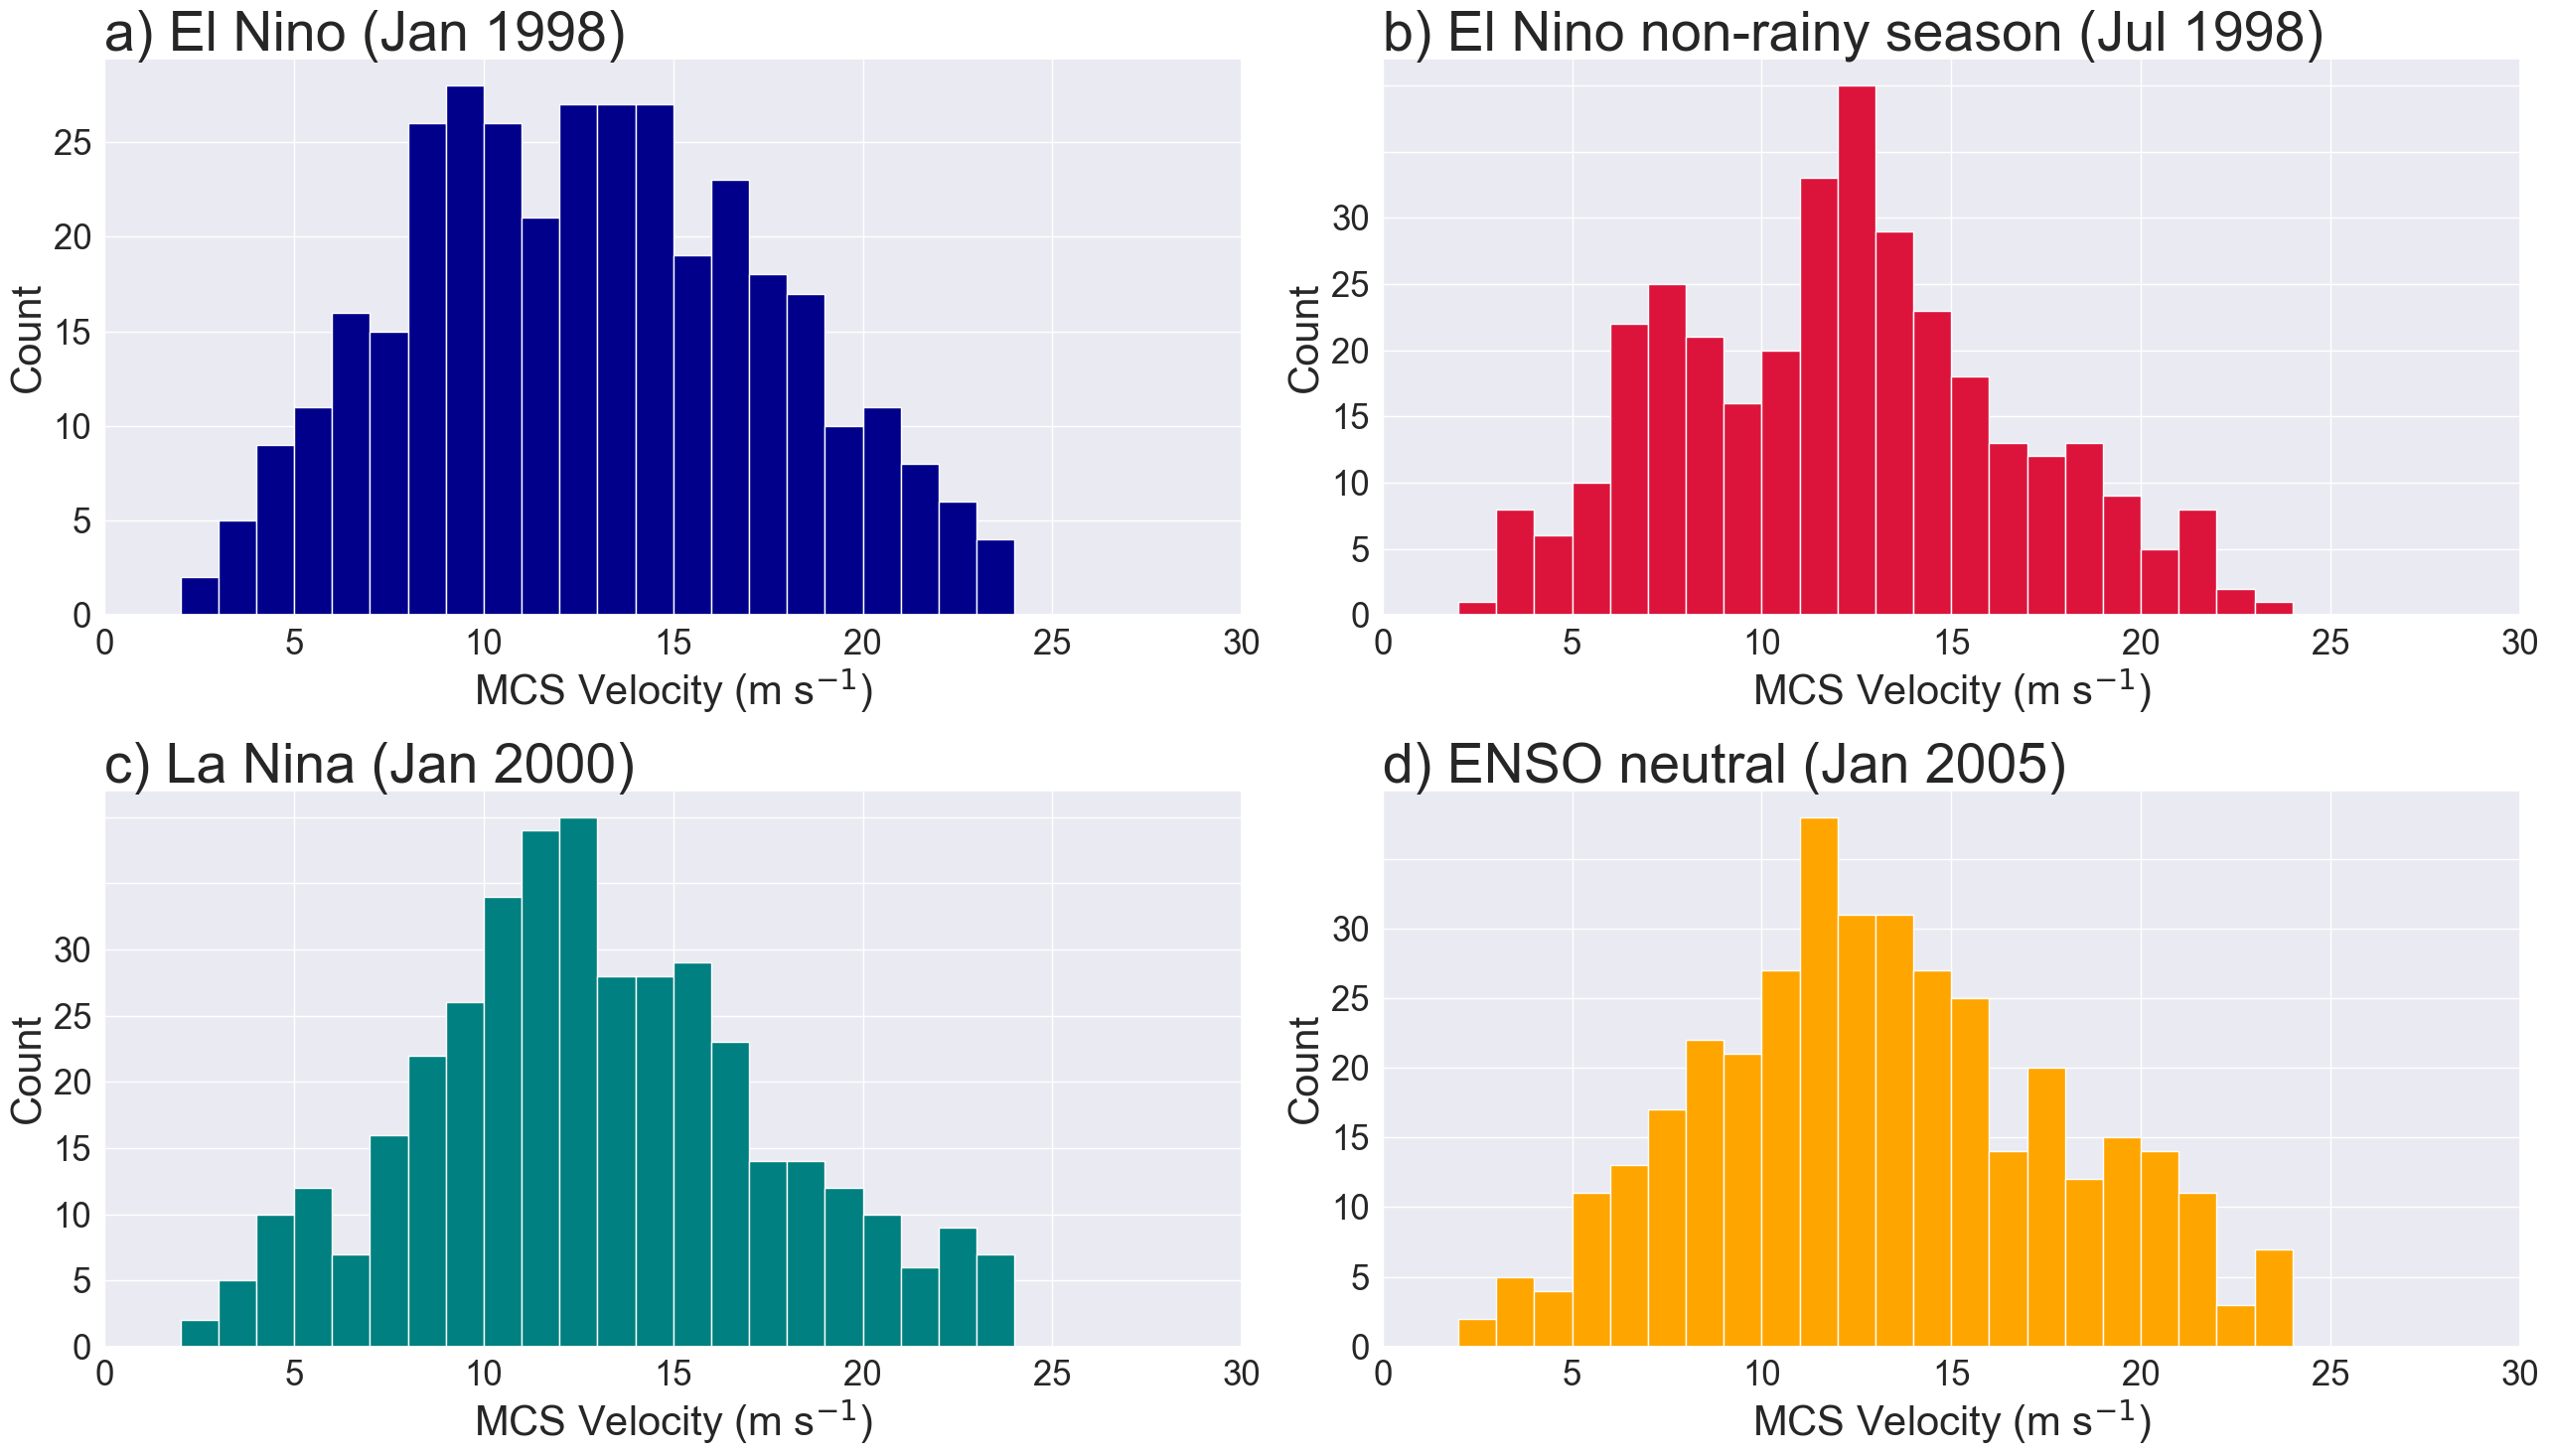

In [110]:
#plots of MCS velocity
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
t = 40
f= 30
n=25
lf= 35

ax1 = plt.subplot(2,2,1)
ax1.set_title('a) El Nino (Jan 1998) ', loc='left', fontsize= t)
bins=bins
ax1.hist(velocity_240_1998, bins=bins,color='darkblue',align='mid')
ax1.set_xlim(0,30)
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax1.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax1.set_ylabel('Count',fontsize=f)

ax2= plt.subplot(2,2,2)
ax2.set_title('b) El Nino non-rainy season (Jul 1998) ', loc='left', fontsize= t)
bins = bins
ax2.hist(velocity_240_jul, bins=bins,align='mid',color='crimson')
ax2.set_xlim(0,30)
ax2.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax2.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax2.set_ylabel('Count',fontsize=f)

ax3= plt.subplot(2,2,3)
ax3.set_title('c) La Nina (Jan 2000) ', loc='left', fontsize= t)
bins = bins
ax3.hist(velocity_240_2000, bins=bins,align='mid',color='teal')
ax3.set_xlim(0,30)
ax3.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax3.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax3.set_ylabel('Count',fontsize=f)

ax4= plt.subplot(2,2,4)
ax4.set_title('d) ENSO neutral (Jan 2005) ', loc='left', fontsize= t)
bins = bins
ax4.hist(velocity_240_2005, bins=bins,align='mid',color='orange')
ax4.set_xlim(0,30)
ax4.set_xticklabels(ax1.get_xticks().astype(int),fontsize=n)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=n)
ax4.set_xlabel('MCS Velocity (m s$^{-1}$)',fontsize=f)
ax4.set_ylabel('Count',fontsize=f)

plt.tight_layout()




In [111]:
bin_edges=np.arange(6,30,2)
density=False

mcstracks_240_cell_1998 = mcstracks_240_1998.groupby("cell")
minutes_240_1998 = (mcstracks_240_cell_1998["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_240_1998 = minutes_240_1998/60 #converting from minutes to hours

mcstracks_240_cell_jul = mcstracks_240_jul.groupby("cell")
minutes_240_jul = (mcstracks_240_cell_jul["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_240_jul = minutes_240_jul/60 #converting from minutes to hours

mcstracks_240_cell_2000 = mcstracks_240_2000.groupby("cell")
minutes_240_2000 = (mcstracks_240_cell_2000["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_240_2000 = minutes_240_2000/60 #converting from minutes to hours

mcstracks_240_cell_2005 = mcstracks_240_2005.groupby("cell")
minutes_240_2005 = (mcstracks_240_cell_2005["time_cell"].max() / pd.Timedelta(minutes=1)).values
lifetime_240_2005 = minutes_240_2005/60 #converting from minutes to hours

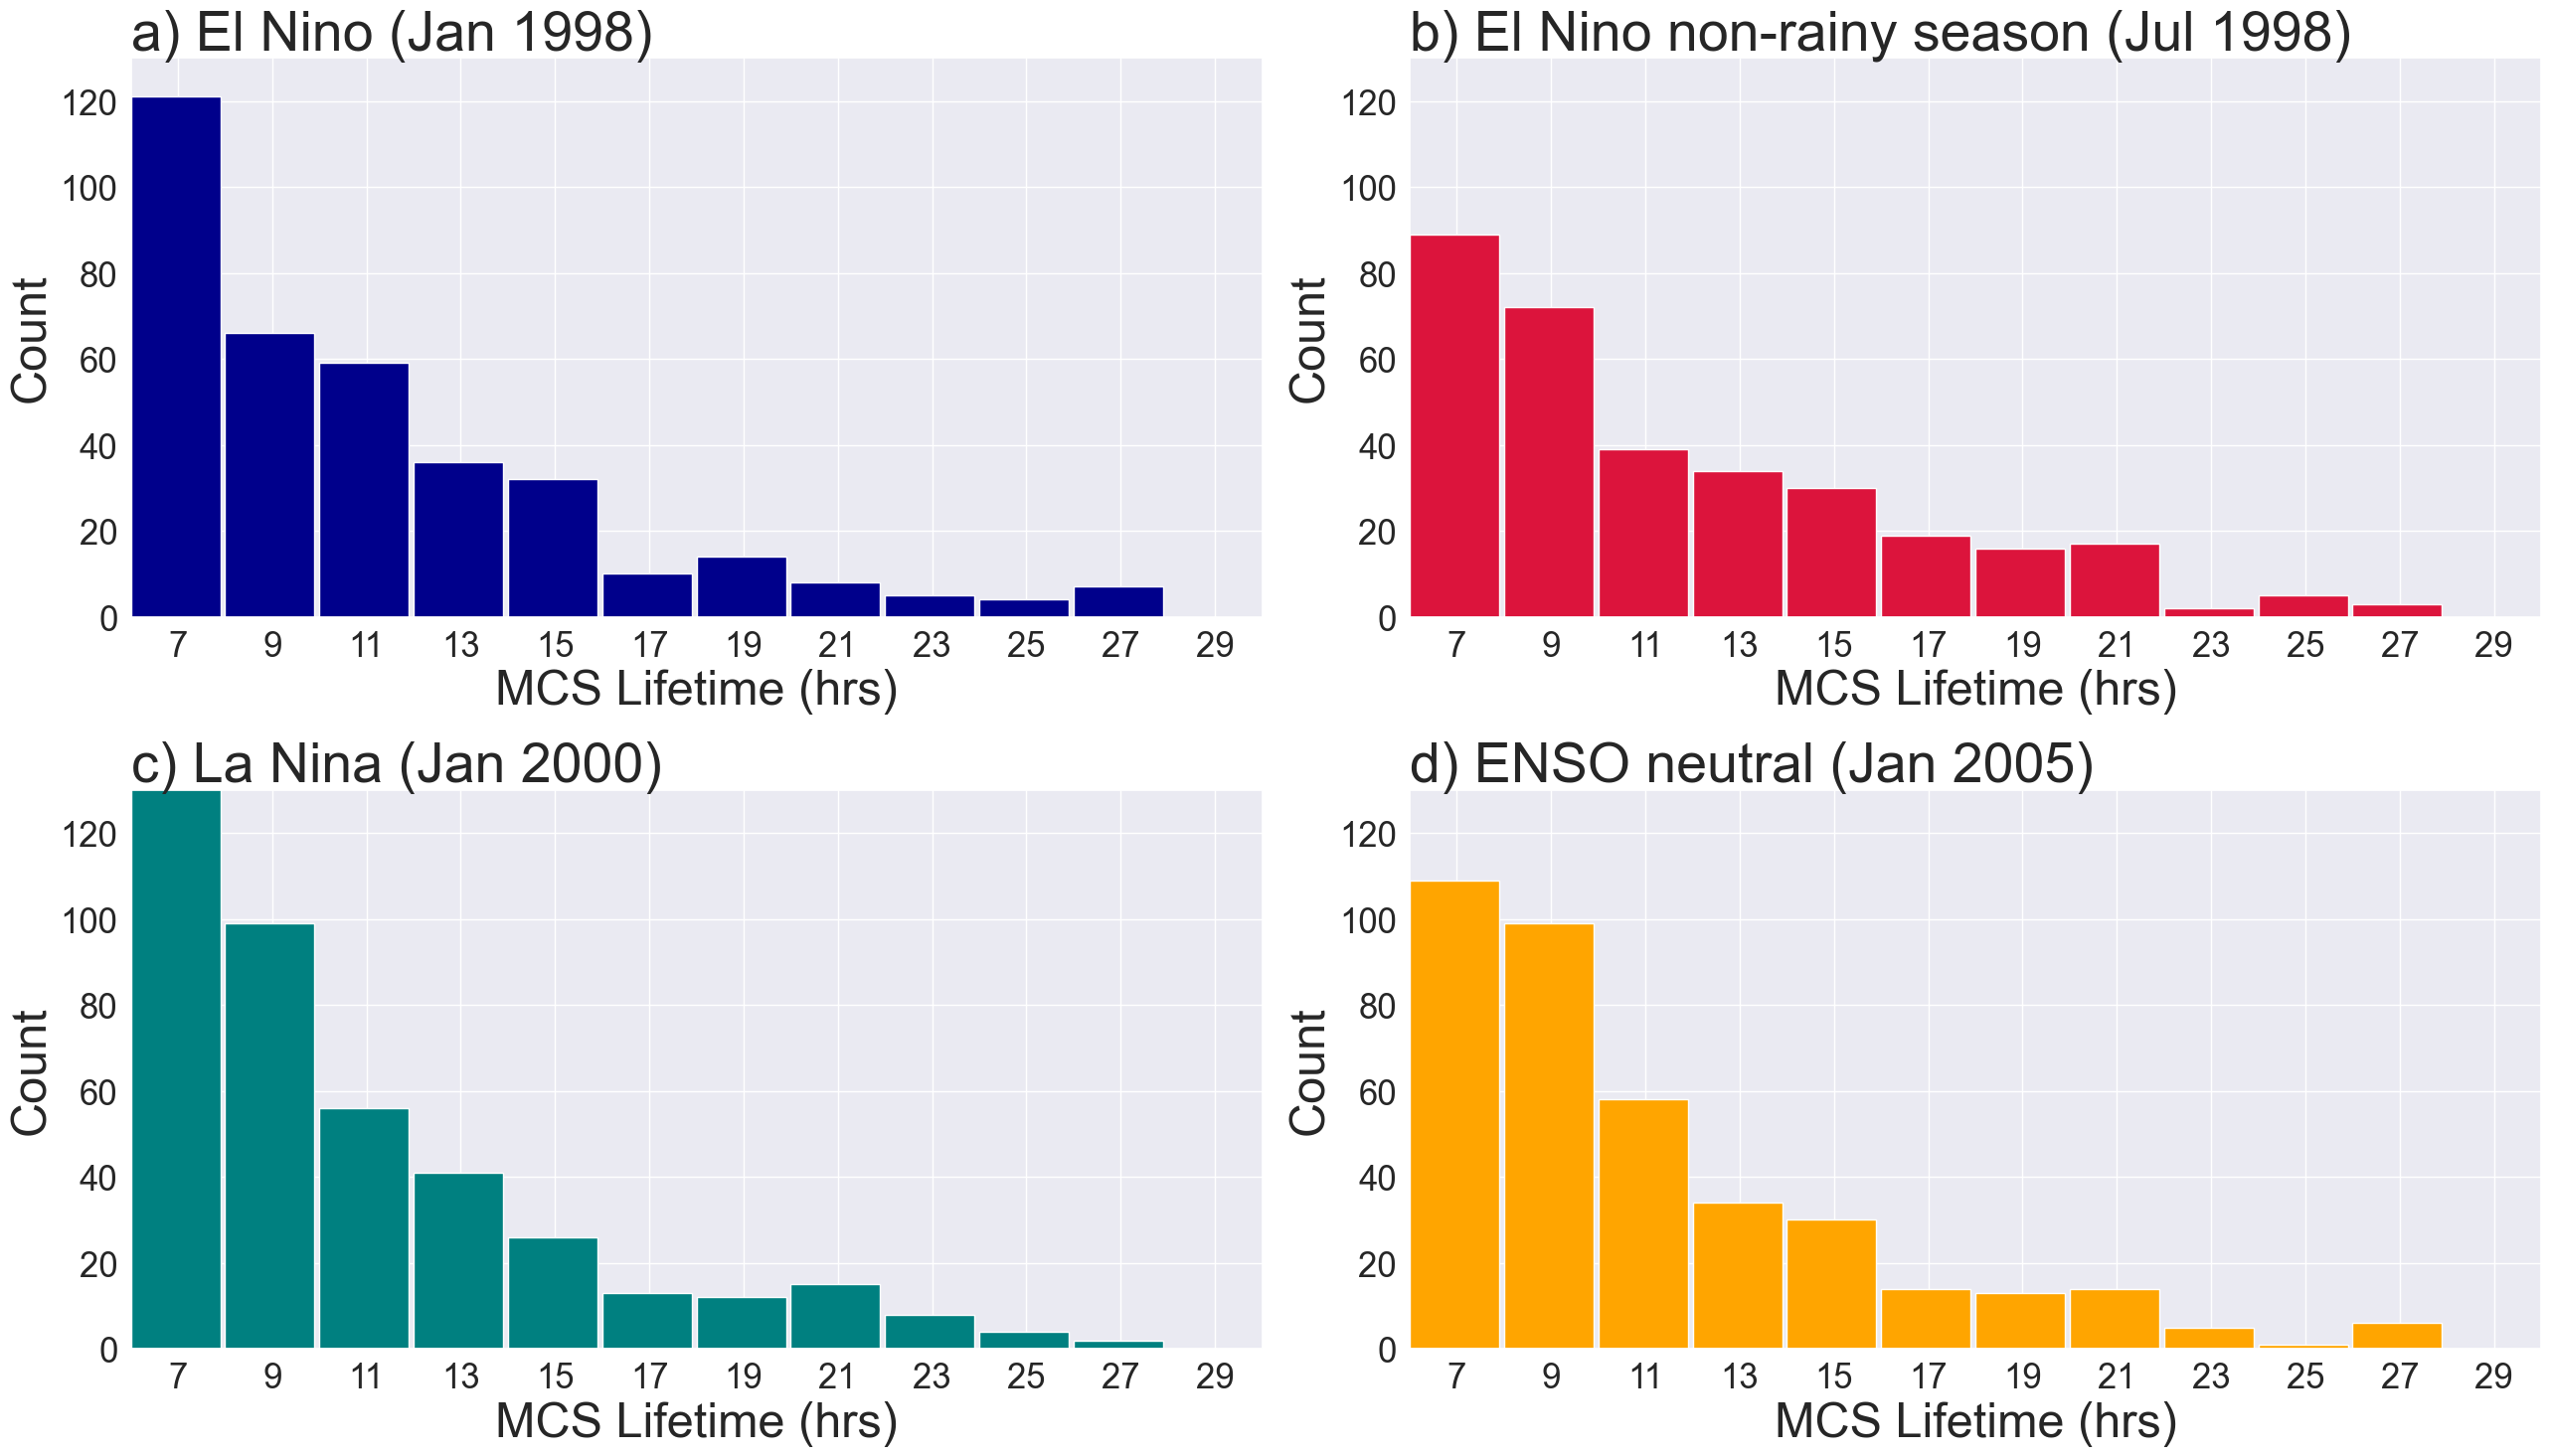

In [112]:
#plots of MCS lifetime
import seaborn as sns 
sns.set(font_scale=1.5)

plt.figure(figsize=(26,15))
f= 40
lf = 35
l = 25

ax1 = plt.subplot(2,2,1)
ax1.set_title('a) El Nino (Jan 1998) ', loc='left', fontsize= f)
bins=bin_edges
ax1.hist(lifetime_240_1998, bins=bin_edges,color='darkblue',align='mid',width=1.9)
ax1.set_xlim(6,30)
ax1.set_ylim(0,130)
ax1.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax1.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax1.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax1.set_ylabel('Count',fontsize=lf)

ax2= plt.subplot(2,2,2)
ax2.set_title('b) El Nino non-rainy season (Jul 1998) ', loc='left', fontsize= f)
bins = bin_edges
ax2.hist(lifetime_240_jul, bins=bin_edges,align='mid',color='crimson',width=1.9)
ax2.set_xlim(6,30)
ax2.set_ylim(0,130)
ax2.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax2.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax2.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax2.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax2.set_ylabel('Count',fontsize=lf)

ax3= plt.subplot(2,2,3)
ax3.set_title('c) La Nina (Jan 2000) ', loc='left', fontsize= f)
bins = bin_edges
ax3.hist(lifetime_240_2000, bins=bin_edges,align='mid',color='teal',width=1.9)
ax3.set_xlim(6,30)
ax3.set_ylim(0,130)
ax3.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax3.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax3.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax3.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax3.set_ylabel('Count',fontsize=lf)

ax4= plt.subplot(2,2,4)
ax4.set_title('d) ENSO neutral (Jan 2005) ', loc='left', fontsize= f)
bins = bin_edges
ax4.hist(lifetime_240_2005, bins=bin_edges,align='mid',color='orange',width=1.9)
ax4.set_xlim(6,30)
ax4.set_ylim(0,130)
ax4.set_xticks([7,9,11,13,15,17,19,21,23,25,27,29])
ax4.set_xticklabels(ax1.get_xticks(),fontsize=l)
ax4.set_yticklabels(ax1.get_yticks().astype(int),fontsize=l)
ax4.set_xlabel('MCS Lifetime (hrs)',fontsize=lf)
ax4.set_ylabel('Count',fontsize=lf)

plt.tight_layout()



**Number of MCS tracks comparison**

In [114]:
tracks_jul = pd.read_csv('Save/Jul_1998/singleTb/sensitivity_analysis_singleTbThreshold.csv')
tracks_1998 = pd.read_csv('Save/Jan_1998/sensitivity_analysis_singleTbThreshold.csv')
tracks_2000 = pd.read_csv('Save/Jan_2000/singleTb/sensitivity_analysis_singleTbThreshold.csv')
tracks_2005 = pd.read_csv('Save/Jan_2005/singleTb/sensitivity_analysis_singleTbThreshold.csv')


Text(0, 0.5, 'No. MCS Tracks in Month')

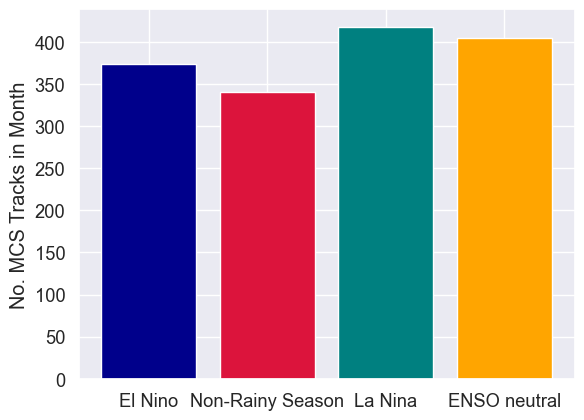

In [150]:
x=['El Nino', 'Non-Rainy Season', 'La Nina', 'ENSO neutral']
y=[tracks_1998['num_tracks'][4], tracks_jul['num_tracks'][4], tracks_2000['num_tracks'][4], tracks_2005['num_tracks'][4]]

plt.bar(x[0], y[0],color='darkblue')
plt.bar(x[1],y[1],color='crimson')
plt.bar(x[2],y[2],color='teal')
plt.bar(x[3],y[3],color='orange')
plt.ylabel('No. MCS Tracks in Month')